In [1]:
# import necessary libraries and specify that graphs should be plotted inline
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# import the dataset into a Pandas dataframe
housing_dataset = pd.read_csv("Housing.csv")# import necessary libraries and specify that graphs should be plotted inline
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
housing_dataset.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing_dataset.isnull().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
housing_dataset.describe()


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


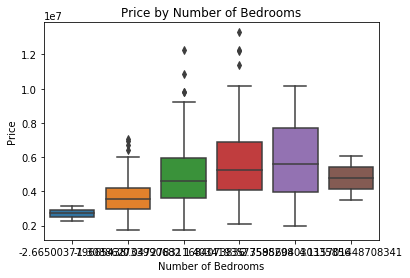

In [23]:
sns.boxplot(x='bedrooms', y='price', data=housing_dataset)
plt.title('Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()


Correlation Analysis: Check how features correlate with the price.



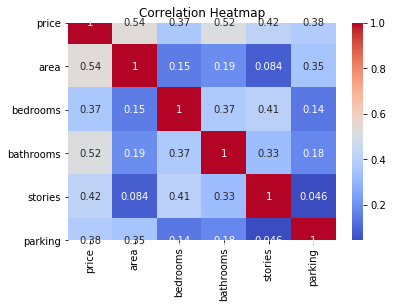

In [8]:
correlation_matrix = housing_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Feature Engineering Code

In [ ]:
# Create a total_rooms feature
housing_dataset['total_rooms'] = housing_dataset['bedrooms'] + housing_dataset['bathrooms']

# Create a price per square foot feature
housing_dataset['price_per_sqft'] = housing_dataset['price'] / housing_dataset['area']

# Display the updated DataFrame with new features
print(housing_dataset[['price', 'area', 'bedrooms', 'bathrooms', 'total_rooms', 'price_per_sqft']].head())


Check for Missing Values

In [10]:
# Check for missing values in the dataset
missing_values = housing_dataset.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])
# Impute missing values with the median for numerical columns
housing_dataset.fillna(housing_dataset.median(), inplace=True)

# Check again for missing values to confirm they have been handled
missing_values_after = housing_dataset.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after[missing_values_after > 0])
# Drop rows with any missing values
housing_dataset.dropna(inplace=True)

# Check again for missing values to confirm they have been handled
missing_values_after_drop = housing_dataset.isnull().sum()
print("Missing Values After Dropping Rows:\n", missing_values_after_drop[missing_values_after_drop > 0])


Missing Values:
 Series([], dtype: int64)
Missing Values After Imputation:
 Series([], dtype: int64)
Missing Values After Dropping Rows:
 Series([], dtype: int64)


In [11]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Select numerical features to standardize
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'total_rooms', 'price_per_sqft']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
housing_dataset[numerical_features] = scaler.fit_transform(housing_dataset[numerical_features])

# Display the updated DataFrame
print(housing_dataset.head())


      price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0  13300000  1.046726  1.403419   1.421812  1.378217      yes        no   
1  12250000  1.757010  1.403419   5.405809  2.532024      yes        no   
2  12250000  2.218232  0.047278   1.421812  0.224410      yes        no   
3  12215000  1.083624  1.403419   1.421812  0.224410      yes        no   
4  11410000  1.046726  1.403419  -0.570187  0.224410      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea  \
0       no              no             yes  1.517692      yes   
1       no              no             yes  2.679409       no   
2      yes              no              no  1.517692      yes   
3      yes              no             yes  2.679409      yes   
4      yes              no             yes  1.517692       no   

  furnishingstatus  total_rooms  price_per_sqft  
0        furnished     1.688416        2.308152  
1        furnished     3.619554        1.079838  
2   semi

Splitting the Dataset

In [12]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Define the feature set (X) and target variable (y)
X = housing_dataset.drop('price', axis=1)  # Features (excluding the target)
y = housing_dataset['price']                # Target variable (price)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (436, 14)
Testing set shape: (109, 14)


Model Selection and Training

In [16]:
# List of categorical features to encode
categorical_features = [
    'mainroad', 
    'guestroom', 
    'basement', 
    'hotwaterheating', 
    'airconditioning', 
    'prefarea', 
    'furnishingstatus'
]

# One-hot encode categorical features
housing_dataset = pd.get_dummies(housing_dataset, columns=categorical_features, drop_first=True)

# Check the updated DataFrame to confirm encoding
print(housing_dataset.head())

# Now, split the dataset again
X = housing_dataset.drop('price', axis=1)  # Features
y = housing_dataset['price']                # Target variable

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Display the model coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


      price      area  bedrooms  bathrooms  total_rooms  price_per_sqft  \
0  13300000  1.046726  1.403419   1.421812     1.688416        2.308152   
1  12250000  1.757010  1.403419   5.405809     3.619554        1.079838   
2  12250000  2.218232  0.047278   1.421812     0.722848        0.683361   
3  12215000  1.083624  1.403419   1.421812     1.688416        1.835081   
4  11410000  1.046726  1.403419  -0.570187     0.722848        1.572441   

   parking_0.35597562605793237  parking_1.5176924895404067  \
0                            0                           1   
1                            0                           0   
2                            0                           1   
3                            0                           0   
4                            0                           1   

   parking_2.679409353022881  stories_0.22441012833299692  \
0                          0                            0   
1                          1                          

Initialize Models and Evaluate Them

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, r2
# Initialize models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# Evaluate each model
models = {
    "Linear Regression": linear_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "Gradient Boosting": gbm_model
}

# Store results
results = {}

for model_name, model in models.items():
    mae, mse, r2 = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R²": r2
    }

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)



                             MAE           MSE        R²
Linear Regression  515486.980078  6.295328e+11  0.875453
Decision Tree      384748.256881  4.153628e+11  0.917824
Random Forest      289505.544037  3.442401e+11  0.931895
Gradient Boosting  268800.907748  1.882740e+11  0.962752


Mean Absolute Error (MAE): The Gradient Boosting model has the lowest MAE, which means it has the least average error in its predictions compared to the others.
Mean Squared Error (MSE): Again, the Gradient Boosting model shows the lowest MSE, indicating it performs better than the others in terms of squared errors.
R² Score: The Gradient Boosting model has the highest R² value (0.9628), suggesting it explains about 96.28% of the variance in the target variable, which is excellent.

In [ ]:
# Voting Regressor
Model Initialization: The individual models are initialized as before.
Voting Regressor: The VotingRegressor combines the predictions of the specified models.
Training and Evaluation: The same train_and_evaluate_model function is used to train and evaluate the voting regressor.

In [18]:
from sklearn.ensemble import VotingRegressor
# Initialize the individual models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)
gbm_model = GradientBoostingRegressor(random_state=42)

# Create a Voting Regressor
voting_model = VotingRegressor(
    estimators=[
        ('linear', linear_model),
        ('decision_tree', decision_tree_model),
        ('random_forest', random_forest_model),
        ('gbm', gbm_model)
    ]
)

# Train and evaluate the Voting Regressor
mae_voting, mse_voting, r2_voting = train_and_evaluate_model(voting_model, X_train, y_train, X_test, y_test)

# Add the results to the results dictionary
results['Voting Regressor'] = {
    "MAE": mae_voting,
    "MSE": mse_voting,
    "R²": r2_voting
}

# Display the updated results
results_df = pd.DataFrame(results).T
print(results_df)


                             MAE           MSE        R²
Linear Regression  515486.980078  6.295328e+11  0.875453
Decision Tree      384748.256881  4.153628e+11  0.917824
Random Forest      289505.544037  3.442401e+11  0.931895
Gradient Boosting  268800.907748  1.882740e+11  0.962752
Voting Regressor   297390.570777  2.872229e+11  0.943176


#Conclusion
Accuracy: The Gradient Boosting model has a lower MAE and MSE, indicating more precise predictions and fewer large errors. Its higher R² score (0.9628) means it explains more variance in the target variable compared to the Voting Regressor (R² = 0.9432).
Therefore, the Gradient Boosting model is the better choice for accuracy in this case.

Model Evaluation

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R²:', r2_score(y_test, y_pred))


MAE: 268800.90774840215
MSE: 188273953815.02893
R²: 0.9627517385972383


Visualization of Predictions

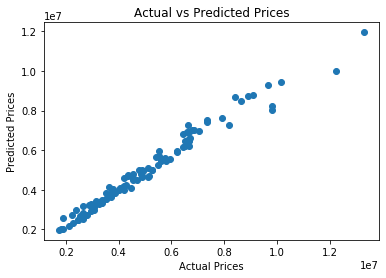

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


conclusion

In [22]:
best_model = results_df['R²'].idxmax()
print(f"The best model is: {best_model}")

The best model is: Gradient Boosting


Conclusion 
Determine the Best Model: Identify which model has the best evaluation metrics based on your criteria (e.g., lowest MAE or highest R²).
Hyperparameter Tuning: Optionally, refine the best model's performance by adjusting its hyperparameters to optimize its performance further.
Feature Importance Analysis: Analyze which features contribute the most to the predictions, providing insights into the data.
Deployment: If applicable, prepare the best-performing model for deployment in a production environment, where it can be used to make predictions on new data.